In [12]:
import numpy as np

import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [29]:
def generate_linear_sample(a, size=15):
    x = np.arange(0, size)
    e = np.random.normal(size=size) 
    
    y = a * x
    return x, y, e

(-2.0, 16.0, -2.0, 14.0)

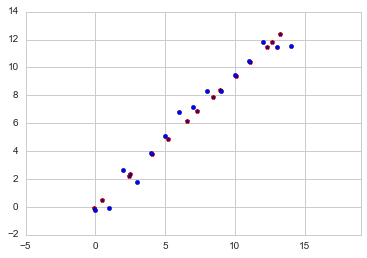

In [268]:
from sklearn.decomposition import PCA
import numpy as np
from numpy.testing import assert_array_almost_equal

# Generate data (column wise dimensions)
x, y, e = generate_linear_sample(np.random.rand(), 15)
X = np.vstack((x,y + e)).T

# pca.fit estimates the components (using an SVD on the centered Xtrain):
Xtrain = X

pca = PCA(n_components=1)
pca.fit(Xtrain)

U, S, VT = np.linalg.svd(Xtrain - Xtrain.mean(0))

## > assert_array_almost_equal(VT[:30], pca.components_)

# pca.transform calculates the loadings as you describe

X_train_pca = pca.transform(Xtrain)

X_train_pca2 = (Xtrain - pca.mean_).dot(pca.components_.T)


# pca.inverse_transform obtains the projection 
# onto components in signal space you are interested in

X_projected = pca.inverse_transform(X_train_pca)
X_projected2 = X_train_pca.dot(pca.components_) + pca.mean_

## > assert_array_almost_equal(X_projected, X_projected2)


plt.scatter(X_projected[:,0], X_projected[:,1], color='red')
plt.scatter(X_projected2[:,0], X_projected2[:,1], marker='*')

plt.scatter(X[:,0], X[:,1])

plt.axis('equal')

(-2.0, 16.0, -2.0, 12.0)

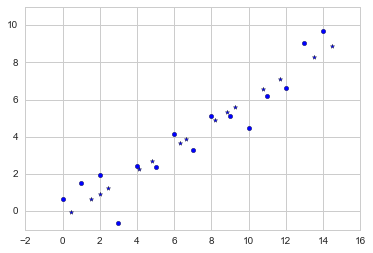

In [350]:
from sklearn.decomposition import PCA
import numpy as np
from numpy.testing import assert_array_almost_equal

def np_pca_proj(X):
    # Projects dataset onto its K=0 princpal components (total least square, or orthogonal projection)
    # manual method using NUMPY

    # pca.fit estimates the components (using an SVD on the centered Xtrain):
    U, S, VT = np.linalg.svd(X - X.mean(axis=0))

    # pca.transform calculates the loadings as you describe
    X_pca = (X - X.mean(axis=0)).dot(VT[0].T)

    # It's about time to get to the really interesting part: 
    # the construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. 
    # Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.   
    
    # pca.inverse_transform obtains the projection 
    # onto components in signal space you are interested in
    
    X_projected = X_pca[:, None].dot(VT[0, None]) + X.mean(axis=0)

    return X_projected

# Generate data (column wise dimensions)
x, y, e = generate_linear_sample(np.random.rand(), 15)
X = np.vstack((x,y + e)).T

X_projected = np_pca_proj(X)

plt.scatter(X_projected[:,0], X_projected[:,1], marker='*')
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')